In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade numpy

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

C:\Users\Madhavi Perera 97\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
print(tf.__version__)

2.9.1


# Visualizing the images and resize images


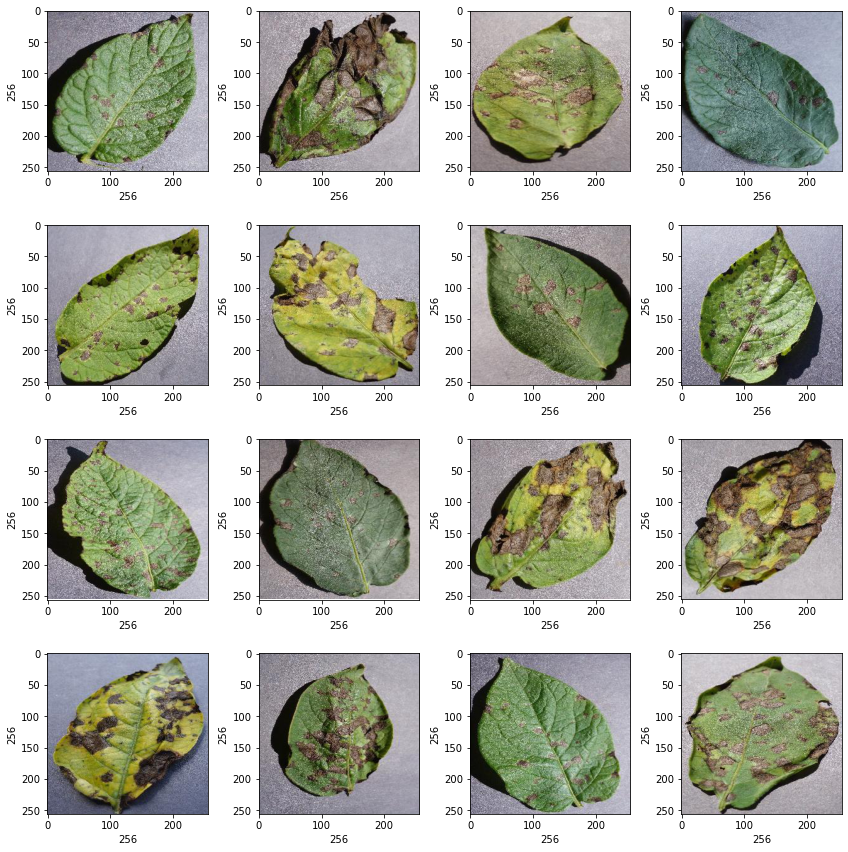

In [5]:
plt.figure(figsize=(12,12))
path = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/original/Potato___Early_blight'
for i in range (1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img =imread(path + '/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)
    

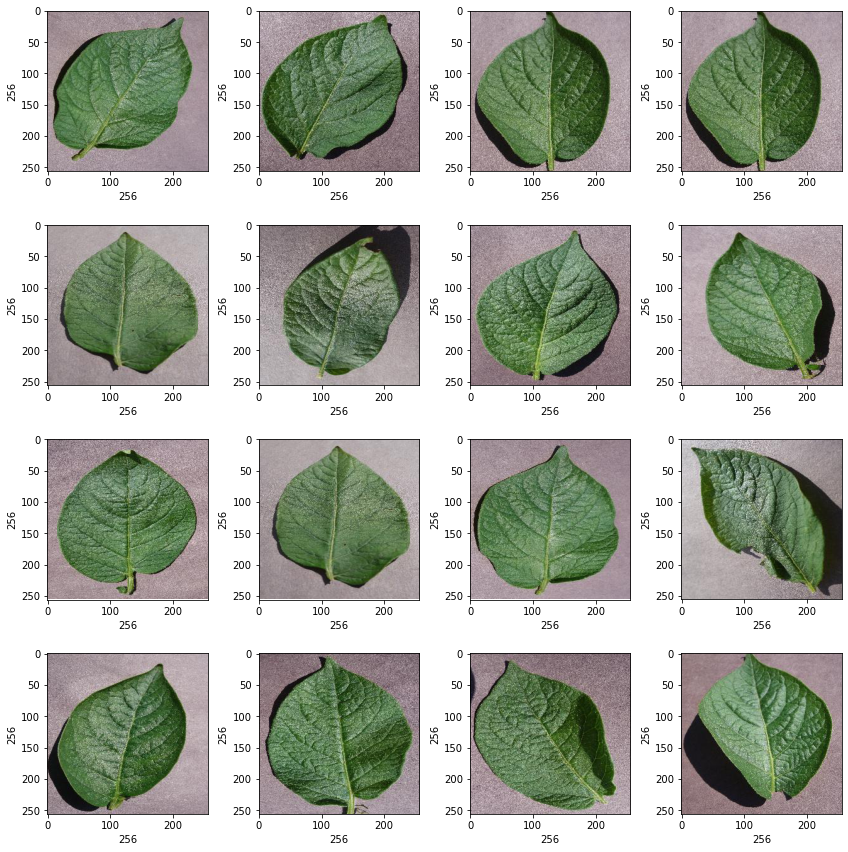

In [6]:
plt.figure(figsize=(12,12))
path = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/Potato___healthy'
for i in range (1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img =imread(path + '/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)
    

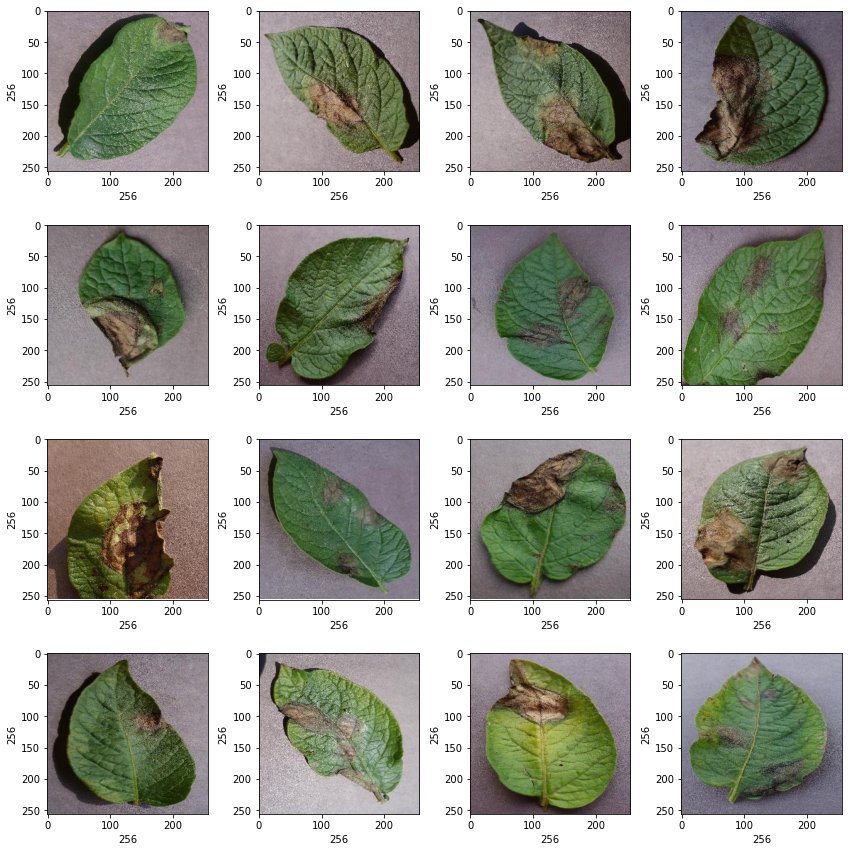

In [7]:
plt.figure(figsize=(12,12))
path = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/original/Potato___Late_blight'
for i in range (1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img =imread(path + '/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)
    

# Visualize the class count & check for class imbalance

In [10]:
# label_counts = pd.DataFrame(label_list).value_counts()
# label_counts.head()

In [11]:
#image_list[0].shape

# Creating augemented dataset

In [12]:
pip install tensorflow pillow


Note: you may need to restart the kernel to use updated packages.


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


# Set paths to your dataset directories
input_dir = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage'
output_dir = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/new'

# Create an ImageDataGenerator instance with augmentation options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Class name for which you want to create augmented images
class_name = 'potato___healthy'

# Target number of images
target_image_count = 1000

# Input and output directories for the specified class
class_dir = os.path.join(input_dir, class_name)
output_class_dir = os.path.join(output_dir, class_name)
os.makedirs(output_class_dir, exist_ok=True)

# Generate augmented images and save them to the output directory
while len(os.listdir(output_class_dir)) < target_image_count:
    for file_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, file_name)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)
        
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_class_dir, save_prefix=class_name, save_format='jpg'):
            if len(os.listdir(output_class_dir)) >= target_image_count:
                break

print(f"Generated {target_image_count} augmented images for class: {class_name}")
print("Data augmentation complete.")


Generated 1000 augmented images for class: potato___healthy
Data augmentation complete.


In [14]:
import os

combined_dataset_dir = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/Combine dataset'
os.makedirs(combined_dataset_dir, exist_ok=True)


In [15]:
import shutil

original_early_blight_dir = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/original/Potato___Early_blight'
original_late_blight_dir = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/original/Potato___Late_blight'

for class_dir in [original_early_blight_dir, original_late_blight_dir]:
    class_name = os.path.basename(class_dir)
    combined_class_dir = os.path.join(combined_dataset_dir, class_name)
    os.makedirs(combined_class_dir, exist_ok=True)
    
    # Copy original images to the combined directory
for filename in os.listdir(class_dir):
        src = os.path.join(class_dir, filename)
        dst = os.path.join(combined_class_dir, filename)
        shutil.copy(src, dst)


In [16]:
augmented_healthy_dir = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/new/potato___healthy'

combined_healthy_dir = os.path.join(combined_dataset_dir, 'potato___healthy')
os.makedirs(combined_healthy_dir, exist_ok=True)

# Copy augmented images to the combined "potato___healthy" directory
for filename in os.listdir(augmented_healthy_dir):
    src = os.path.join(augmented_healthy_dir, filename)
    dst = os.path.join(combined_healthy_dir, filename)
    shutil.copy(src, dst)


In [19]:
import os
import random

# Path to the directory containing the images
image_directory = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/Combine dataset/potato___healthy'

# Number of images to delete
num_images_to_delete = 133

# List all the files in the directory
image_files = os.listdir(image_directory)

# Shuffle the list of image files
random.shuffle(image_files)

# Delete the specified number of images
for i in range(num_images_to_delete):
    if i < len(image_files):
        image_file = image_files[i]
        image_path = os.path.join(image_directory, image_file)
        os.remove(image_path)
        print(f"Deleted: {image_path}")
    else:
        break

print(f"Deleted {num_images_to_delete} images.")


Deleted: C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/Combine dataset/potato___healthy\potato___healthy_0_1835.jpg
Deleted: C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/Combine dataset/potato___healthy\potato___healthy_0_469.jpg
Deleted: C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/Combine dataset/potato___healthy\potato___healthy_0_2843.jpg
Deleted: C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/Combine dataset/potato___healthy\potato___healthy_0_230.jpg
Deleted: C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/Combine dataset/potato___healthy\potato___healthy_0_4184.jpg
Deleted: C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/Combine dataset/potato___healthy\potato___healthy_0_7640.jpg
Deleted: C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/Plant

# Convert images into a numpy array and normalize them

In [20]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image,(256,256))
            return img_to_array(image)
        else:
            return np.array([1])
    except Exception as e:
            print(f"Error : (e)")
            return None

In [23]:
dir = 'C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/PlantVillage/Combine dataset'
image_list, label_list = [], []
all_labels = ['Potato___Early_blight','potato___healthy','Potato___Late_blight']
binary_labels=[0,1,2]
temp =-1

#Reading and converting image to numpy array
for directory in ['Potato___Early_blight','potato___healthy','Potato___Late_blight']:
    plant_image_list =listdir(f"{dir}/{directory}")
    temp += 1
    
    for files in plant_image_list:
        image_path= f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])


In [24]:
print(f"Number of samples in image_list: {len(image_list)}")
print(f"Number of samples in label_list: {len(label_list)}")


Number of samples in image_list: 3000
Number of samples in label_list: 3000


# Visualize the class count & check for class imbalance

In [25]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    1000
1    1000
2    1000
dtype: int64

In [26]:
# Count the number of occurrences of each class
class_counts = {label: label_list.count(binary_label) for label, binary_label in zip(all_labels, binary_labels)}

# Print the class counts
for label, count in class_counts.items():
    print(f"Class: {label}, Count: {count}")


Class: Potato___Early_blight, Count: 1000
Class: potato___healthy, Count: 1000
Class: Potato___Late_blight, Count: 1000


In [27]:
image_list[0].shape

(256, 256, 3)

# Splitting the dataset into train , validate and test sets

In [28]:

x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)


In [29]:
import numpy as np

In [30]:
x_train = np.array(x_train, dtype = np.float16)/255.0
x_test = np.array(x_test, dtype = np.float16)/255.0
x_train = x_train.reshape(-1, 256,256,3)
x_test = x_test.reshape(-1,256,256,3)


# one-hot encoding

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [32]:
for i in range(5):  # Print the first 5 samples
    image = image_list[i]  # Assuming image_list contains image data
    label = label_list[i]  # Assuming label_list contains labels
    print(f"Sample {i + 1}: Image Shape: {image.shape}, Label: {label}")


Sample 1: Image Shape: (256, 256, 3), Label: 0
Sample 2: Image Shape: (256, 256, 3), Label: 0
Sample 3: Image Shape: (256, 256, 3), Label: 0
Sample 4: Image Shape: (256, 256, 3), Label: 0
Sample 5: Image Shape: (256, 256, 3), Label: 0


In [33]:
images = image_list[-5:]
labels = label_list[-5:]

for i in range(5):  # Print the first 5 samples
    image = images[i]  # Assuming image_list contains image data
    label = labels[i]  # Assuming label_list contains labels
    print(f"Sample {i + 1}: Image Shape: {image.shape}, Label: {label}")


Sample 1: Image Shape: (256, 256, 3), Label: 2
Sample 2: Image Shape: (256, 256, 3), Label: 2
Sample 3: Image Shape: (256, 256, 3), Label: 2
Sample 4: Image Shape: (256, 256, 3), Label: 2
Sample 5: Image Shape: (256, 256, 3), Label: 2


In [34]:
print(f"Number of samples in x_test: {x_test.shape[0]}")
print(f"Number of samples in y_test: {y_test.shape[0]}")


Number of samples in x_test: 600
Number of samples in y_test: 600


# Create the model, compile the model, fit the model using the training data

In [35]:
model= Sequential()
model.add (Conv2D(32,(3,3), padding ='Same', input_shape = (256,256,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add((Conv2D(16,(3,3), padding ='Same',  activation ='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [39]:
model.compile(loss = 'categorical_crossentropy' , optimizer = Adam(0.0001) , metrics = ['accuracy'])

In [40]:
#Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val= train_test_split(x_train,y_train, test_size = 0.2, random_state= 10)



In [41]:
#Train the model

epochs = 50
batch_size=128
#verbose =1
history = model.fit(x_train, y_train, batch_size= batch_size, verbose=1, epochs=epochs, validation_data=(x_val,y_val))

Epoch 1/50
15/15 [==============================] - 83s 4s/step - loss: 1.0771 - accuracy: 0.3641 - val_loss: 1.0346 - val_accuracy: 0.3583
Epoch 2/50
15/15 [==============================] - 32s 2s/step - loss: 1.0162 - accuracy: 0.3667 - val_loss: 0.9685 - val_accuracy: 0.4750
Epoch 3/50
15/15 [==============================] - 24s 2s/step - loss: 0.9510 - accuracy: 0.4297 - val_loss: 0.9056 - val_accuracy: 0.5104
Epoch 4/50
15/15 [==============================] - 22s 1s/step - loss: 0.9011 - accuracy: 0.5010 - val_loss: 0.8573 - val_accuracy: 0.4333
Epoch 5/50
15/15 [==============================] - 20s 1s/step - loss: 0.8613 - accuracy: 0.5250 - val_loss: 0.8223 - val_accuracy: 0.5792
Epoch 6/50
15/15 [==============================] - 21s 1s/step - loss: 0.8292 - accuracy: 0.6266 - val_loss: 0.7944 - val_accuracy: 0.6417
Epoch 7/50
15/15 [==============================] - 17s 1s/step - loss: 0.8002 - accuracy: 0.6651 - val_loss: 0.7664 - val_accuracy: 0.7104
Epoch 8/50
15/15 [==

In [42]:
model.save ('C:/Users/Madhavi Perera 97/Desktop/ML COURSE/potato disease detection/model/potato_disease_model.h5')

# Plot the accuracy & loss against each epoch

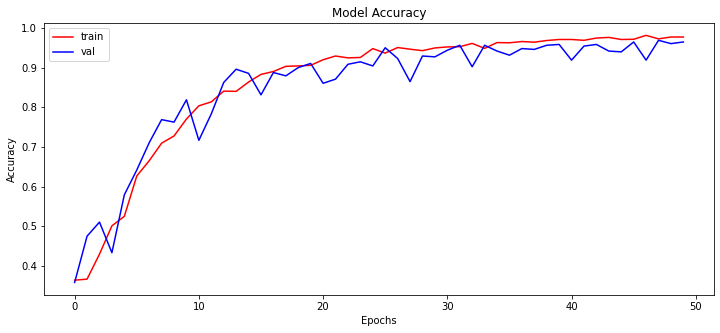

In [43]:
plt.figure(figsize =(12,5))
plt.plot(history.history['accuracy'], color ='r')
plt.plot(history.history['val_accuracy'], color= 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()


In [45]:
print('calculating model accuracy')
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")


calculating model accuracy
19/19 [==============================] - 2s 79ms/step - loss: 0.4438 - accuracy: 0.9683
Test Accuracy: 96.83%


In [46]:
y_pred = model.predict(x_test)

19/19 [==============================] - 2s 78ms/step


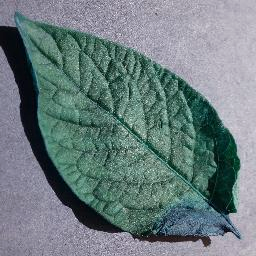

In [47]:
img=array_to_img(x_test[11])
img

In [50]:
print('original label:' , all_labels[np.argmax(y_test[11])])
print('predicted label:' , all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

original label: Potato___Late_blight
predicted label: Potato___Early_blight
[0.3123354  0.36526573 0.32239896]


In [52]:
for i in range (50):
    print(all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred[i])])

potato___healthy   potato___healthy
Potato___Early_blight   Potato___Early_blight
potato___healthy   potato___healthy
potato___healthy   potato___healthy
Potato___Early_blight   Potato___Early_blight
potato___healthy   potato___healthy
Potato___Late_blight   Potato___Late_blight
potato___healthy   potato___healthy
Potato___Late_blight   Potato___Late_blight
Potato___Late_blight   potato___healthy
Potato___Early_blight   Potato___Early_blight
Potato___Late_blight   Potato___Late_blight
Potato___Late_blight   Potato___Early_blight
Potato___Early_blight   Potato___Early_blight
Potato___Late_blight   Potato___Early_blight
potato___healthy   potato___healthy
potato___healthy   potato___healthy
Potato___Early_blight   Potato___Early_blight
potato___healthy   potato___healthy
Potato___Early_blight   Potato___Early_blight
Potato___Early_blight   Potato___Early_blight
potato___healthy   potato___healthy
Potato___Early_blight   Potato___Early_blight
potato___healthy   potato___healthy
Potato___L